In [59]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [60]:
titanic = pd.read_csv (r"C:\Users\Mehdi Zribi\Desktop\AI\12- DP DV Checkpoint\titanic-passengers.csv",sep=";")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [61]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [62]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [63]:
#Problem
# P1

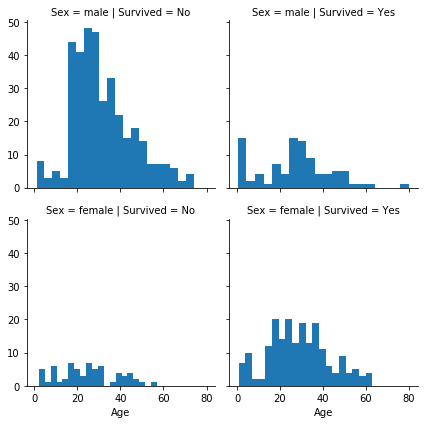

In [64]:
g=sns.FacetGrid(titanic,row ='Sex', col='Survived')
g.map(plt.hist,'Age' , bins = 20)

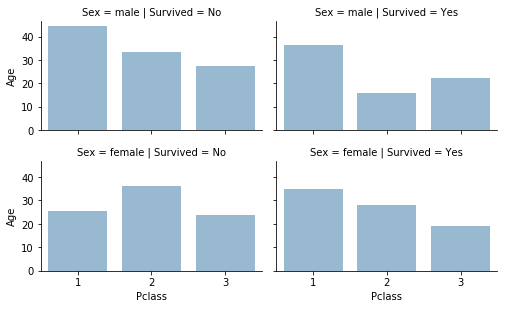

In [65]:
grid=sns.FacetGrid(titanic,row ='Sex' , col = 'Survived' , size =2.2 ,  aspect= 1.6)
grid.map(sns.barplot, 'Pclass' ,'Age', alpha = .5, ci = None)
grid.add_legend()

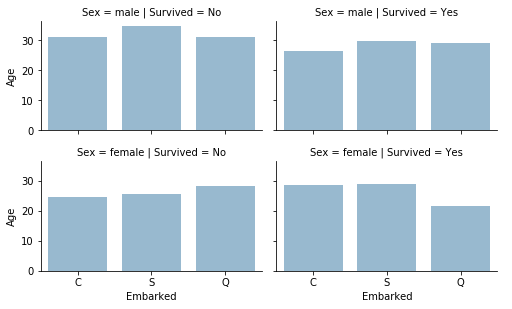

In [66]:
grid=sns.FacetGrid(titanic,row ='Sex' , col = 'Survived' , size =2.2 ,  aspect= 1.6)
grid.map(sns.barplot, 'Embarked' ,'Age', alpha = .5, ci = None)
grid.add_legend()

In [67]:
def plot_correlation_map (titanic):
    corr = titanic.corr()
    s, ax = plt.subplots(figsize  = (12 , 10))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    s=sns.heatmap(
        corr,
        cmapn= cmap,
        square = True,
        cbar_kws = {'shrink': .9 },
        ax = ax,
        annot = True,
        annot_kws = {'fontsize' : 12}
        )

In [76]:
def plot_correlation_map( titanic ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

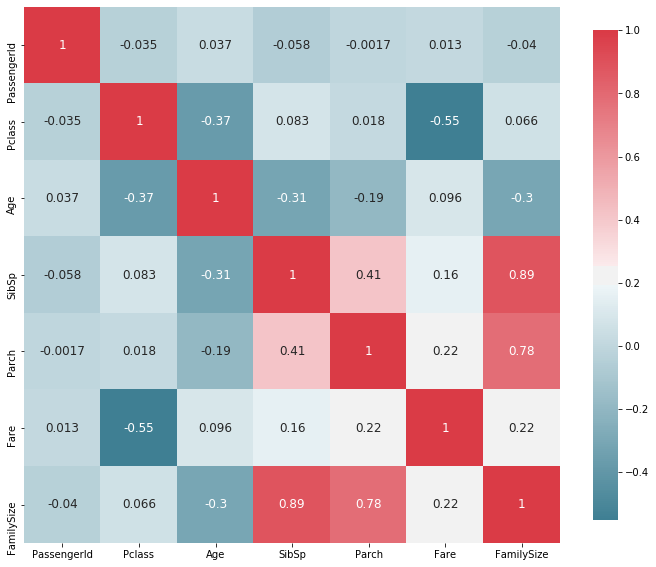

In [77]:
plot_correlation_map(titanic)

In [78]:
titles = set()
for name in titanic ['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [79]:
print(titles)

{'Ms', 'Major', 'Jonkheer', 'Dr', 'Sir', 'Master', 'Miss', 'Don', 'Mlle', 'Mme', 'Capt', 'the Countess', 'Lady', 'Mr', 'Rev', 'Mrs', 'Col'}


In [80]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Dona" : "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    titanic['Title'] = titanic['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    
    titanic['Title'] =titanic.Title.map(Title_Dictionary)
   
    return titanic

In [81]:
titanic = get_titles()

In [82]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs,4
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,1


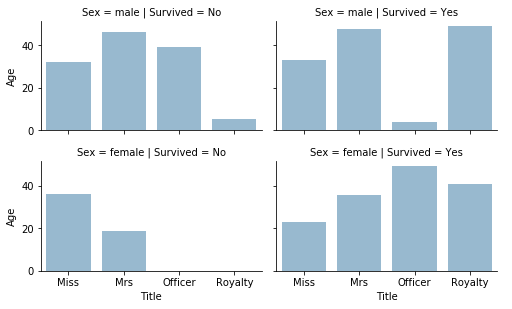

In [83]:
grid=sns.FacetGrid(titanic,row ='Sex' , col = 'Survived' , size =2.2 ,  aspect= 1.6)
grid.map(sns.barplot, 'Title' ,'Age', alpha = .5, ci = None)
grid.add_legend()

In [75]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs,4
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,1


In [85]:
titanic[['Survived' , 'FamilySize']].groupby(['Survived'], as_index = True).mean()

,FamilySize
Survived,
No,0.883424
Yes,0.938596
